In [1]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('../')
from tools.mongo_analysis_tools import *
from tools.plots import get_dendro_heatmap, get_expression_hist
from tools.get_predictive_power import gene_predictive_accuracy

#import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True) # run at the start of every ipython notebook

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
output = collect_run_output(3582, 7640, 'PAN_CANCER_classifier_ST', verbose=1)

All these experiments belong to experiment: PAN_CANCER_classifier_ST


In [4]:
runs_per_classifier(output)

,id,#runs
name,,
LinearSVC,"[3582, 3588, 3596, 3604, 3613, 3622, 3630, 363...",333
RandomForestClassifier,"[3583, 3584, 3585, 3586, 3587, 3589, 3590, 359...",2498


In [5]:
predict_label = output[0]['config']['predict_label']
data_latex(predict_label)

For the label subtype_tumor we have 11572 samples and 62 different labels. The classes and their support are as follows:\\
ACC\_True: 79, AML\_True: 185, BLCA\_False: 19, BLCA\_True: 414, BRCA\_False: 113, BRCA\_True: 1109, CESC\_False: 3, CESC\_True: 306, CHOL\_False: 9, CHOL\_True: 36, COAD\_False: 41, COAD\_True: 480, DLBC\_True: 48, ESCA\_False: 11, ESCA\_True: 162, GBM\_False: 5, GBM\_True: 169, HNSC\_False: 44, HNSC\_True: 502, KICH\_False: 24, KICH\_True: 65, KIRC\_False: 72, KIRC\_True: 539, KIRP\_False: 32, KIRP\_True: 289, LAML\_True: 151, LGG\_True: 529, LIHC\_False: 50, LIHC\_True: 374, LUAD\_False: 59, LUAD\_True: 535, LUSC\_False: 49, LUSC\_True: 502, MESO\_True: 86, NBL\_True: 157, OV\_True: 379, PAAD\_False: 4, PAAD\_True: 178, PCPG\_False: 3, PCPG\_True: 183, PRAD\_False: 52, PRAD\_True: 499, READ\_False: 10, READ\_True: 167, RT\_False: 5, SARC\_False: 2, SARC\_True: 263, SKCM\_False: 1, SKCM\_True: 471, STAD\_False: 32, STAD\_True: 375, TGCT\_True: 156, THCA\_False: 5

In [6]:
def data_latex(label, subset=None, subset_label=None, label_path = '../data/TCGA/exp_TCGA_coded_labels_add.csv'):
    if subset is None:
        labels = pd.read_csv(label_path)[label].dropna().values
    else:
        df = pd.read_csv(label_path)
        sub = df.loc[df[subset_label] == subset]
        labels = sub[label].dropna().values
    
    amount = labels.shape[0]
    labels, count = np.unique(labels, return_counts=True)
    n_labels = len(labels)
    print('For the label {} we have {} samples and {} different labels. The classes and their support are as follows:\\\\'.format(label, amount, n_labels))
    string = ''
    for i, l in enumerate(labels):
        c = count[i]
        l = escape_latex(l)
        string += '{}: {}, '.format(l, c)
    string = string[:-2]
    print(string)

In [7]:
selected_genes_ids, similarities = compute_gene_importance(output, similarity=10, latex=True)
similarities

\textbf{Gene analysis:}\\
The models selected have the following number of genes:\\
LinearSVC: 1256\\
RandomForestClassifier: 3374\\
Intersection: 428\\


{'LinearSVC': [0.9035031847133763,
  0.9028397027600856,
  0.822823779193207,
  0.880891719745224,
  0.870793524416137,
  0.8178742038216575,
  0.8915870488322725,
  0.6862924628450107,
  0.8833200636942683,
  0.8684049893842902],
 'RandomForestClassifier': [0.8872961755114149,
  0.8436209111572279,
  0.8808479098725159,
  0.7880818262674123,
  0.7660094871034707,
  0.8404288961359812,
  0.8689247949402111,
  0.9061270876568851,
  0.8655548967289262,
  0.6643252321675505]}

In [8]:
latex_genes(selected_genes_ids)

These are the top 428 genes in order of importance:\\
KRT5$\text{\textbar}$3852, HIST1H4C$\text{\textbar}$8364, NKX2-1$\text{\textbar}$7080, ALDH1L1$\text{\textbar}$10840, GPR87$\text{\textbar}$53836, ESM1$\text{\textbar}$11082, PKP1$\text{\textbar}$5317, CAPNS2$\text{\textbar}$84290, KLK3$\text{\textbar}$354, HOXB13$\text{\textbar}$10481, F8A3$\text{\textbar}$474384, HIST2H2AA3$\text{\textbar}$8337, TRPV6$\text{\textbar}$55503, HIST2H2AA4$\text{\textbar}$723790, DNER$\text{\textbar}$92737, ENPP3$\text{\textbar}$5169, KLHL14$\text{\textbar}$57565, CEACAM6$\text{\textbar}$4680, ZCCHC12$\text{\textbar}$170261, CFHR1$\text{\textbar}$3078, GPM6A$\text{\textbar}$2823, GC$\text{\textbar}$2638, SH3GL2$\text{\textbar}$6456, POU3F3$\text{\textbar}$5455, IRX1$\text{\textbar}$79192, APOC3$\text{\textbar}$345, MUC15$\text{\textbar}$143662, SOX8$\text{\textbar}$30812, SLCO1C1$\text{\textbar}$53919, ALB$\text{\textbar}$213, GFAP$\text{\textbar}$2670, VTCN1$\text{\textbar}$79679, TCF21$\text{\textbar

In [8]:
print_latex_config(output)

\textbf{Framework configuration:}\\
Data subset:\\
Predict label: subtype\_tumor\\
Split label: subtype\_tumor\\
Train test split: 0.25\\
Classifiers: LinearSVC and RandomForestClassifier\\
Stop running: similarity $> 0.8$, for 10 consecutive runs\\
Number of genes selected per algorithm: 250\\


In [9]:
print_latex_prediction_metrics(output)

\textbf{Prediction metrics:}\\
Average accuracy: 0.9269 (0.0002)\\
Average Cohen kappa: 0.924 (0.0002)\\
Average accuracy LSVM: 0.9597 (0.0)\\
Average accuracy RandomForestClassifier: 0.9226 (0.0)\\


Saved cm image T_classifier_ST_cm.png

The Confusion matrix can be found in figure \ref{fig:cm-ST}. The Classification Report can be found in table \ref{tab:cr-ST}.

\begin{figure}[H]
\centering
\includegraphics[height=5cm]{T_classifier_ST_cm.png}
\caption{Normalized Confusion Matrix over the test set}
\label{fig:cm-ST}
\end{figure}


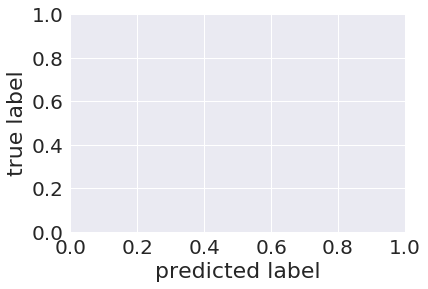

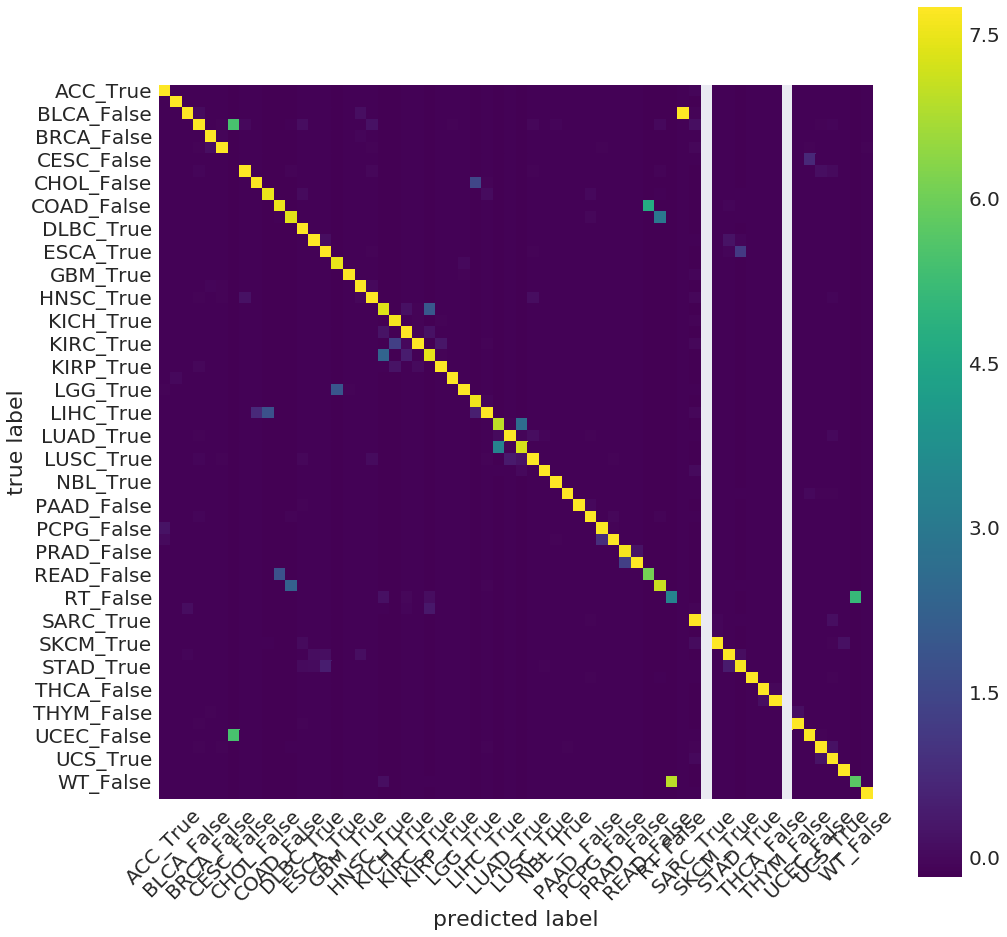

In [12]:
save_confusion_matrix(output, theNotebook)

In [11]:
print_latex_cr(output)

\textbf{Classification Report:}\\
\begin{tabular}{lrrrr}
\toprule
{} &    fscore &  precision &    recall &  support \\
\midrule
ACC\_True   &  0.945518 &   0.936853 &  0.955652 &     20.0 \\
AML\_True   &  0.993234 &   0.986719 &  0.999970 &     47.0 \\
BLCA\_False &  0.512701 &   0.873272 &  0.399435 &      5.0 \\
BLCA\_True  &  0.903618 &   0.919165 &  0.889489 &    104.0 \\
BRCA\_False &  0.944323 &   0.961185 &  0.929950 &     29.0 \\
BRCA\_True  &  0.984322 &   0.980335 &  0.988406 &    278.0 \\
CESC\_False &  0.000000 &   0.000000 &  0.000000 &      1.0 \\
CESC\_True  &  0.914931 &   0.940046 &  0.892026 &     77.0 \\
CHOL\_False &  0.073684 &   0.141646 &  0.050394 &      3.0 \\
CHOL\_True  &  0.678920 &   0.813804 &  0.603438 &      9.0 \\
COAD\_False &  0.866844 &   0.796567 &  0.953727 &     11.0 \\
COAD\_True  &  0.846324 &   0.748522 &  0.976969 &    120.0 \\
DLBC\_True  &  0.947602 &   0.903768 &  1.000000 &     12.0 \\
ESCA\_False &  0.391798 &   0.663340 &  0.292947 &  

In [13]:
gene_predictive_accuracy(output, selected_genes_ids, latex=True)

Reading data
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating LinearSVC
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
Predicting and evaluating RandomForestClassifier
We have 428 selected genes as a result, doing the same prediction again but only with these genes we get the following accuracies average

{'LinearSVC': [0.946159122085048,
  0.9468449931412894,
  0.9458161865569273,
  0.946159122085048,
  0.9471879286694102,
  0.9471879286694102,
  0.946159122085048,
  0.9465020576131687,
  0.9458161865569273,
  0.946159122085048],
 'LinearSVC_avr': 0.9463991769547325,
 'RandomForestClassifier': [0.9314128943758574,
  0.9307270233196159,
  0.9324417009602195,
  0.9310699588477366,
  0.9296982167352538,
  0.9327846364883402,
  0.9331275720164609,
  0.9314128943758574,
  0.934156378600823,
  0.9351851851851852],
 'RandomForestClassifier_avr': 0.9322016460905351}

In [13]:
selected_genes_data, selected_genes_ids, sample_to_label = get_dendro_data(predict_label, selected_genes_ids)

heatmap, legend, color_scale = get_dendro_heatmap(selected_genes_data, selected_genes_ids, sample_to_label, color_option=1, nb_genes_used=50)
histogram = get_expression_hist(selected_genes_data, decimals=2, drop_zero=True, log=False, color_scale=color_scale)

In [14]:
#iplot(heatmap)

In [15]:
#iplot(histogram)

In [16]:


latex_heatmap(heatmap, histogram, theNotebook)

Succeeded in saving T_classifier_ST_hist.png
The dendro-heatmap can be found in figure \ref{fig:heat-ST}. The top 50 most enriched pathways can be found in table \ref{tab:pw-ST}.

\begin{figure}[H]
\centering
\includegraphics[height=5cm]{T_classifier_ST_heat.png}
\caption{Dendro-heatmap for the top genes}
\label{fig:heat-ST}
\end{figure}


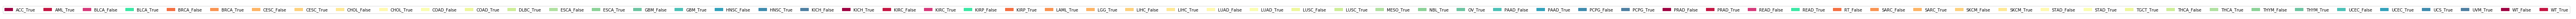

In [18]:
path = '../plots/figures/'
leg_name = '{}_legend.png'.format(theNotebook)
legend.savefig(os.path.join(path, leg_name)) 
legend

In [19]:
latex_genes(selected_genes_ids[:50])

These are the top 50 genes in order of importance:\\
KRT5$\text{\textbar}$3852, HIST1H4C$\text{\textbar}$8364, NKX2-1$\text{\textbar}$7080, ALDH1L1$\text{\textbar}$10840, GPR87$\text{\textbar}$53836, ESM1$\text{\textbar}$11082, PKP1$\text{\textbar}$5317, CAPNS2$\text{\textbar}$84290, KLK3$\text{\textbar}$354, HOXB13$\text{\textbar}$10481, F8A3$\text{\textbar}$474384, HIST2H2AA3$\text{\textbar}$8337, TRPV6$\text{\textbar}$55503, HIST2H2AA4$\text{\textbar}$723790, DNER$\text{\textbar}$92737, ENPP3$\text{\textbar}$5169, KLHL14$\text{\textbar}$57565, CEACAM6$\text{\textbar}$4680, ZCCHC12$\text{\textbar}$170261, CFHR1$\text{\textbar}$3078, GPM6A$\text{\textbar}$2823, GC$\text{\textbar}$2638, SH3GL2$\text{\textbar}$6456, POU3F3$\text{\textbar}$5455, IRX1$\text{\textbar}$79192, APOC3$\text{\textbar}$345, MUC15$\text{\textbar}$143662, SOX8$\text{\textbar}$30812, SLCO1C1$\text{\textbar}$53919, ALB$\text{\textbar}$213, GFAP$\text{\textbar}$2670, VTCN1$\text{\textbar}$79679, TCF21$\text{\textbar}

In [20]:
pw_latex(selected_genes_ids)

querying 1-50...done. [ from cache ]
querying 0/287
querying 50/287
querying 100/287
querying 150/287
querying 200/287
querying 250/287
collected the 50 most enriched pathways
The top 50 most enriched pathways based on these genes are:\\
\begin{tabular}{llr}
\toprule
{} &                                               name &   p\_value \\
\midrule
0  &  Activated PKN1 stimulates transcription of AR ... &  0.000025 \\
1  &                          RHO GTPases activate PKNs &  0.000088 \\
2  &      FOXA2 and FOXA3 transcription factor networks &  0.000179 \\
3  &                         Packaging Of Telomere Ends &  0.000309 \\
4  &                        Transport of organic anions &  0.000378 \\
5  &                              Meiotic recombination &  0.000534 \\
6  &                  RNA Polymerase I Promoter Opening &  0.000558 \\
7  &                                    DNA methylation &  0.000609 \\
8  &         SIRT1 negatively regulates rRNA Expression &  0.000720 \\
9  &        